In [57]:
from keras.models import *
from keras.layers import *
from tensorflow.keras.optimizers import *
from keras.preprocessing.image import *
import matplotlib.pyplot as plt

In [58]:
data_dir="data/"
Dis = []
for file in os.listdir(data_dir):
    Dis += [file]
print(Dis)
print(len(Dis))


['Benign', 'Early', 'Pre', 'Pro']
4


In [59]:
img_height,img_width=128,128
batch_size=20

In [60]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                    target_size=(
                                                        img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training')
test_generator = train_datagen.flow_from_directory(data_dir,
                                                   target_size=(
                                                       img_height, img_width),
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   subset='validation')



Found 2281 images belonging to 4 classes.
Found 975 images belonging to 4 classes.


In [61]:
classifier = Sequential()

classifier.add(Convolution2D(512, (3, 3), input_shape=(128, 128, 3), activation='relu',strides=(3,3)))

classifier.add(MaxPooling2D(pool_size=(3, 3)))

classifier.add(Convolution2D(256, (2, 2), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(1, 1)))

classifier.add(Flatten())

classifier.add(Dense(units=64, activation='relu'))

classifier.add(Dense(units=4, activation='softmax'))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history=classifier.fit(train_generator,epochs = 50,validation_data = test_generator,verbose = 1)

classifier.save("models/CNN_1.h5")


Epoch 1/50
115/115 [==============================] - 41s 347ms/step - loss: 1.3935 - accuracy: 0.3108 - val_loss: 1.3094 - val_accuracy: 0.3764
Epoch 2/50
115/115 [==============================] - 36s 312ms/step - loss: 1.0083 - accuracy: 0.5520 - val_loss: 1.2234 - val_accuracy: 0.5251
Epoch 3/50
115/115 [==============================] - 38s 333ms/step - loss: 0.5047 - accuracy: 0.7953 - val_loss: 1.7797 - val_accuracy: 0.6246
Epoch 4/50
115/115 [==============================] - 36s 313ms/step - loss: 0.4048 - accuracy: 0.8255 - val_loss: 1.6825 - val_accuracy: 0.7036
Epoch 5/50
115/115 [==============================] - 35s 305ms/step - loss: 0.4165 - accuracy: 0.8220 - val_loss: 1.4080 - val_accuracy: 0.6903
Epoch 6/50
115/115 [==============================] - 33s 289ms/step - loss: 0.2891 - accuracy: 0.8777 - val_loss: 2.1413 - val_accuracy: 0.7190
Epoch 7/50
115/115 [==============================] - 36s 311ms/step - loss: 0.2696 - accuracy: 0.8834 - val_loss: 1.8016 - val_ac

C:\Users\ymts0585\AppData\Local\Temp\ipykernel_3064\2765264251.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(history.history['accuracy'],'r',label='Testing accuracy',color='green')


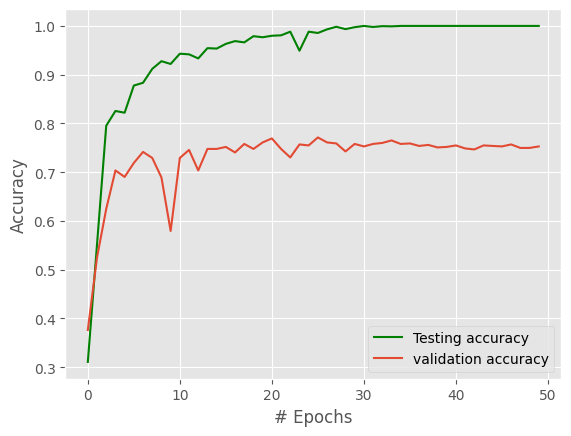

C:\Users\ymts0585\AppData\Local\Temp\ipykernel_3064\2765264251.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(history.history['loss'],'r',label='Testing losses',color='green')


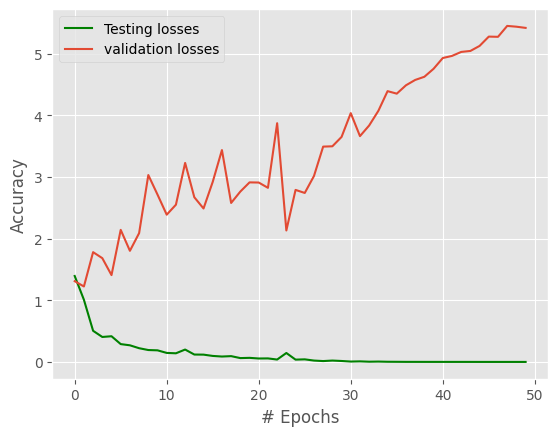

1.0


In [63]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='Testing accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("models/cnn_acc.png")
plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='Testing losses',color='green')
plt.plot(history.history['val_loss'],label='validation losses')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("models/cnn_loss.png")
plt.show()


acc=history.history['accuracy'][-1]
print(acc)
